Chapter 6 Exercises

In [1]:
pip install numpy == 1.24

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '=='

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Navid\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial


from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)


from l0bnb import fit_path

print("done")

done


9

A

In [3]:
College = load_data('College')
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
College.dtypes

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [5]:
College = College.drop(['Private'], axis= 1)
College

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [6]:
design = MS(College.columns.drop("Apps")).fit(College)
Y = np.array(College['Apps'])
X = design.transform(College)

In [7]:
validation = skm.ShuffleSplit(n_splits=1, test_size=0.2, random_state= 0)

In [8]:


strategy = Stepwise.first_peak(design, direction='forward', max_terms= len(design.terms))


In [9]:
full_path = sklearn_selection_path(OLS, strategy)

B - Ordinary Least Squares

In [10]:
for train_idx, test_idx in validation.split(Y):
    full_path.fit(X.iloc[train_idx],Y[train_idx])
    Yhat_val = full_path.predict(X.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx,None])**2
    validation_mse = errors.mean(0)

In [11]:
validation_mse

array([9222372.6260796 , 1741730.35776894, 1312846.7130785 ,
       1357606.20931225, 1338715.55464017, 1345995.77368386,
       1185891.96876649, 1178405.93828891, 1188132.37505203,
       1191447.11283109, 1181105.26073105, 1191694.21737731,
       1179788.25832281, 1180404.49472239, 1180038.78831756,
       1182085.05233506, 1182113.66674999])

C - Ridge Regresssion

In [12]:
D = design.fit_transform(College)
D = D.drop('intercept', axis=1)
X = np.asarray(D)


In [13]:
scaler = StandardScaler(with_mean=True, with_std=True)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

In [14]:
K=5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [15]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X, Y)


C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5094407699.378127, tolerance: 1019016.1716550725
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate d

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.58550912e+04, 2.04897176e+04, 1.62377508e+04, 1.28681398e+04,
       1.01977807e+04, 8.08156683e+03, 6.40450350e+03, 5.07545950e+03,
       4.02221485e+03, 3.18753649e+03, 2.52606815e+03, 2.00186581e+03,
       1.58644442e+03, 1.25723007e+03, 9.96333331e+02, 7.89577126e+02,
       6.25726369e+02, 4.95877447e+02,...
       2.14653509e-04, 1.70109235e-04, 1.34808660e-04, 1.06833557e-04,
       8.46637672e-05, 6.70945876e-05, 5.31713132e-05, 4.21373564e-05,
       3.33931343e-05, 2.64634879e-05, 2.09718616e-05, 1.66198417e-05,
       1.31709403e-05, 1.04377449e-05, 8.27173435e-06, 6.55520802e-06,
       5.19489025e-06, 4.11686168e-06, 3.26254248e-06, 2.58550912e-06]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

In [16]:
tuned_ridge = pipeCV.named_steps['ridge']
np.min(tuned_ridge.mse_path_.mean(1))

1321413.0243496706

Minimum MSE ^

In [17]:
tuned_ridge.alpha_

2.5855091174821566e-06

Lamda Value of Minimum MSE point (its called alphas for some reason) ^^^^

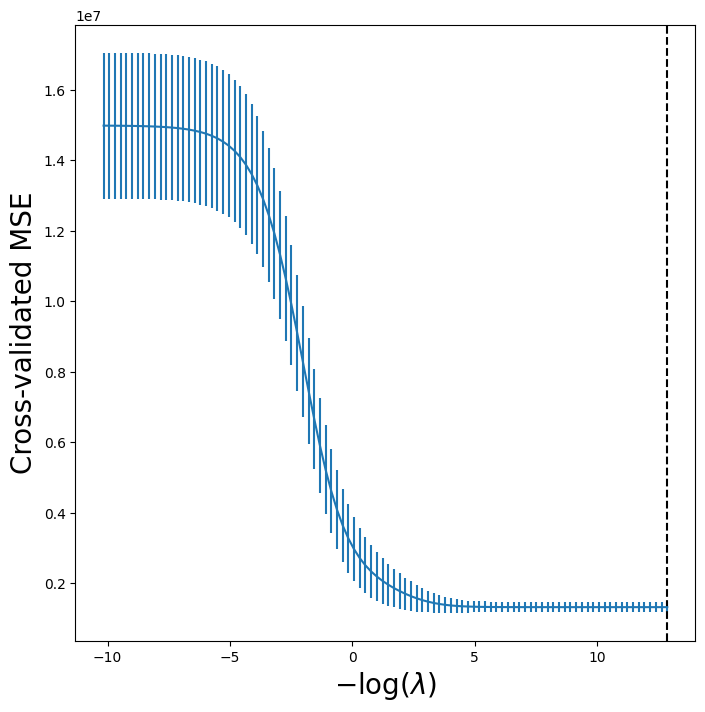

In [18]:
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
tuned_ridge.mse_path_.mean(1),
yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

D - The Lasso

In [19]:
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

16.937127046474224

Lambda Value Chosen by the Lasso ^

In [20]:
np.min(tuned_lasso.mse_path_.mean(1))

1314690.170240149

^^^ Test Error of the Lasso

In [21]:
tuned_lasso.coef_

array([3648.7540121 , -220.82357219,  653.57301721,  -98.40488428,
          0.        ,   57.38341076, -348.56651142,  127.40761963,
          0.        ,    4.95273097,  -74.39972321,  -19.13864451,
         56.54884329,  -25.85446894,  391.18906692,   90.22939964])

All but 2 Coefficients are non-zero in the lasso

In [22]:
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]



lambdas , soln_array = skl.Lasso.path(Xs, Y, l1_ratio=1, n_alphas=100)[:2]

soln_path = pd.DataFrame(soln_array.T, columns=D.columns, index=-np.log(lambdas))

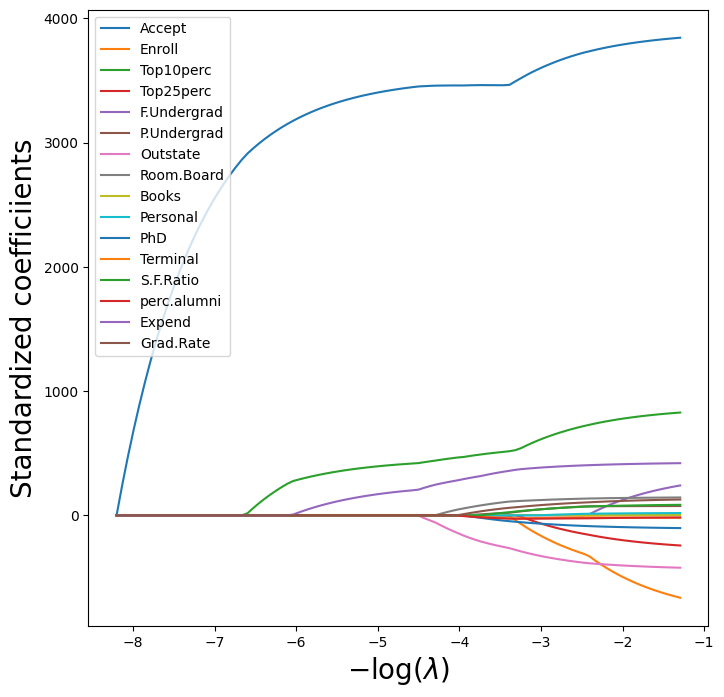

In [23]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

E - Principal Component Regression

In [24]:
pca = PCA(n_components=2)

linreg = skl.LinearRegression()

pipe = Pipeline([('scaler', scaler), ('pca', pca), ('linreg', linreg)])


pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([ 555.88857096, 1562.19845575])

In [25]:
param_grid = {'pca__n_components': range(1, 17)}

grid = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring= 'neg_mean_squared_error')

grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 17)},
             scoring='neg_mean_squared_error')

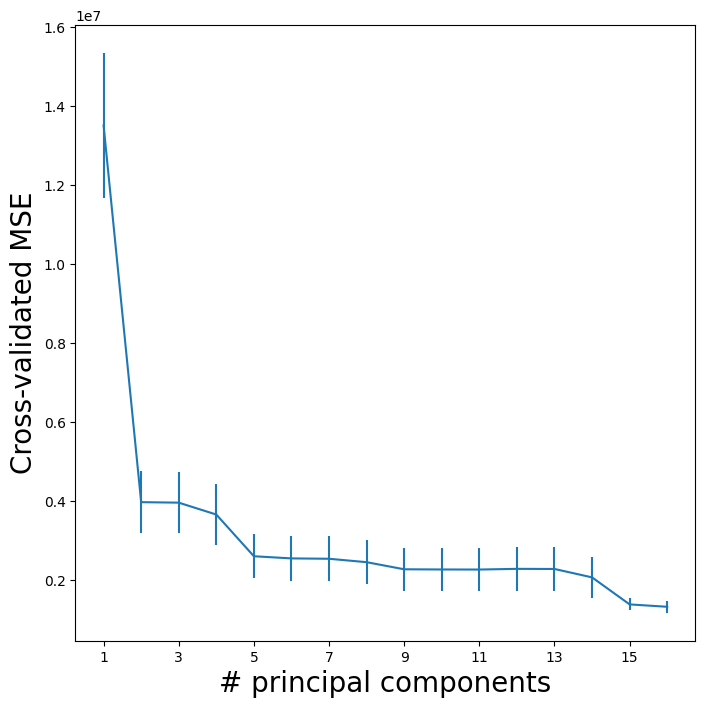

In [26]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
-grid.cv_results_['mean_test_score'],
grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2]);

The Value of M selected by Cross Validation is 15-16, which co-enforces the results obtained by the lasso - that two of the features proved no help in estimating the response

In [27]:
grid.cv_results_

{'mean_fit_time': array([0.00240221, 0.00180182, 0.00180163, 0.00200167, 0.00200195,
        0.00200171, 0.00200171, 0.00200171, 0.00200205, 0.00240216,
        0.00200167, 0.00200186, 0.00120082, 0.00160151, 0.0016016 ,
        0.00180154]),
 'std_fit_time': array([4.90154518e-04, 4.00591138e-04, 4.00257480e-04, 4.67203091e-07,
        7.13664510e-07, 3.16297988e-07, 4.10190833e-07, 3.50402318e-07,
        3.50402318e-07, 4.90290765e-04, 4.90933902e-07, 3.23406696e-07,
        4.00233336e-04, 4.90407565e-04, 4.90290765e-04, 4.00209441e-04]),
 'mean_score_time': array([0.00060058, 0.0004003 , 0.00040016, 0.        , 0.00060039,
        0.0004004 , 0.00040045, 0.00020018, 0.00020018, 0.0004004 ,
        0.0004003 , 0.00040026, 0.0008009 , 0.00060048, 0.00060034,
        0.0004004 ]),
 'std_score_time': array([0.00049037, 0.00049027, 0.0004901 , 0.        , 0.00049021,
        0.00049039, 0.00049045, 0.00040035, 0.00040035, 0.00049039,
        0.00049027, 0.00049021, 0.00040045, 0.000490

F - Partial Least Squares Regresssion

In [28]:
pls = PLSRegression(n_components=2, scale=True)
pls.fit(X, Y)

PLSRegression()

In [29]:
param_grid = {'n_components': range(1, 17)}
grid = skm.GridSearchCV(pls, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 17)},
             scoring='neg_mean_squared_error')

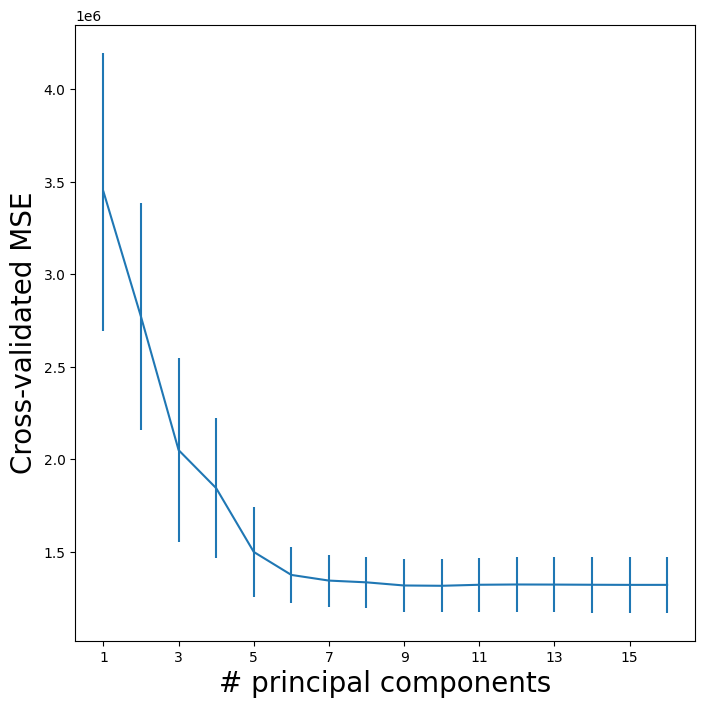

In [30]:
pls_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
-grid.cv_results_['mean_test_score'],
grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2]);

In [31]:
param_grid = {'n_components': range(1, 17)}
grid = skm.GridSearchCV(pls, param_grid, cv=kfold, scoring='r2')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 17)}, scoring='r2')

In [32]:
grid.cv_results_

{'mean_fit_time': array([0.0008007 , 0.00120125, 0.00140114, 0.00200181, 0.00200181,
        0.00200162, 0.00240211, 0.00280223, 0.00280261, 0.00340323,
        0.00340328, 0.00400362, 0.00440397, 0.00460415, 0.00500474,
        0.00500455]),
 'std_fit_time': array([4.00352677e-04, 4.00615005e-04, 4.90310330e-04, 7.89305942e-07,
        1.78416128e-07, 2.43140197e-07, 4.90719312e-04, 4.00352847e-04,
        4.00185624e-04, 4.90232324e-04, 4.90485595e-04, 1.16800773e-07,
        4.90057186e-04, 4.89920871e-04, 1.90734863e-07, 5.56082906e-07]),
 'mean_score_time': array([0.00040035, 0.00060062, 0.00020018, 0.        , 0.        ,
        0.00060062, 0.00040064, 0.00040054, 0.0004003 , 0.00040026,
        0.00080051, 0.00020018, 0.00020027, 0.00020013, 0.00020003,
        0.00040035]),
 'std_score_time': array([0.00049033, 0.00049041, 0.00040035, 0.        , 0.        ,
        0.00049041, 0.00049068, 0.00049056, 0.00049027, 0.00049021,
        0.00040026, 0.00040035, 0.00040054, 0.000400

G

We can predict the number of applications with a near 90% accuracy at best, based on the cross validated R^2 score. The regularized methods predict better than the traditional OLS. This is because it is implied that 2 of the features have little to do with the response.

11

A

In [33]:
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [34]:
Boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

In [35]:
design = MS(Boston.columns.drop("crim")).fit(Boston)
Y = np.array(Boston['crim'])
X = design.transform(Boston)

In [36]:
D = design.fit_transform(Boston)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [37]:
scaler = StandardScaler(with_mean=True, with_std=True)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

In [38]:
K=5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [39]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X, Y)

C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13344.559497078752, tolerance: 2.6689123336522464
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate 

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([1.16373233e+07, 9.22237967e+06, 7.30857817e+06, 5.79192321e+06,
       4.59000009e+06, 3.63749658e+06, 2.88265383e+06, 2.28445386e+06,
       1.81039062e+06, 1.43470360e+06, 1.13697807e+06, 9.01035676e+05,
       7.14055364e+05, 5.65876665e+05, 4.48447579e+05, 3.55387037e+05,
       2.81638150e+05, 2.23193417e+05,...
       9.66151022e-02, 7.65658162e-02, 6.06770999e-02, 4.80855640e-02,
       3.81069871e-02, 3.01991356e-02, 2.39322985e-02, 1.89659373e-02,
       1.50301810e-02, 1.19111614e-02, 9.43939168e-03, 7.48055648e-03,
       5.92821308e-03, 4.69800748e-03, 3.72309059e-03, 2.95048562e-03,
       2.33820940e-03, 1.85299096e-03, 1.46846365e-03, 1.16373233e-03]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

In [40]:
tuned_ridge = pipeCV.named_steps['ridge']
np.min(tuned_ridge.mse_path_.mean(1))

42.91415199821885

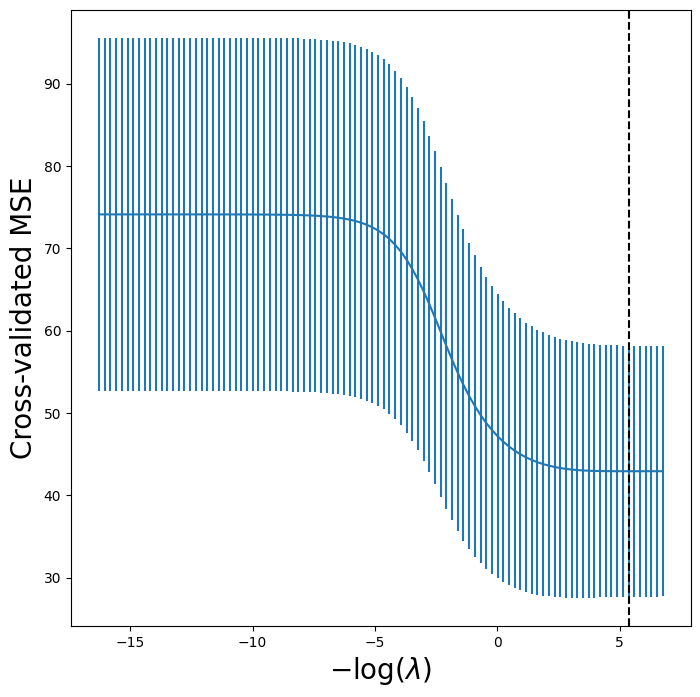

In [41]:
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
tuned_ridge.mse_path_.mean(1),
yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

The results from the cross validated ridge regression show that it preforms best with little-to-no shrinkage, implying an optimal model with all of features. Without further exploration,  I would be led to believe that there would not be any meaningful advantage to using lasso, PCR,  or PLS. I would go with either the ridge model or a linear model with all of the features.